# CLASE 4.2: INTRODUCCIÓN A LA COMPUTACIÓN SIMBÓLICA CON SYMPY.
---
## Introducción.
La computación simbólica corresponde a un paradigma de computación completamente diferente al basado en arreglos numéricos que hemos estado desarrollando durante la asignatura. En un software de computación simbólica (conocidos popularmente como sistemas de álgebra computacional, o CAS), las representaciones de objetos matemáticos y expresiones se manipulan y transforman analíticamente, de la misma forma en que haríamos cálculos con lápiz y papel, aunque -por supuesto- con un alcance mucho mayor. Por tanto, la computación simbólica constituye una fantástica herramienta para el chequeo y *debugging* de cálculos analíticos hechos a mano y, más importante aún, para llevar a cabo análisis que, de otro modo, serían imposibles de realizar.

La computacional simbólica es un elemento clave de la computación científica, e incluso para problemas que pueden ser resueltos únicamente mediante métodos numéricos (lo que es muy común en el campo de la ciencia de datos), podemos hacer una gran diferencia al llegar a los límites de los cálculos analíticos que pueden realizarse antes de proceder a la implementación de técnicas numéricas. Aquello puede, por ejemplo, reducir la complejidad o el tamaño de un problema previo a resolverlo numéricamente. En otras palabras, en vez de resolver un problema de manera inmediata mediante algún método numérico, las herramientas de computación simbólica nos permitirán simplificarlo primero.

Existen algunas librerías de computación científica en Python, siendo **Sympy** (acrónimo de *Symbolic Python*), indudablemente, la más popular de todas. **Sympy** es una librería escrita completamente en Python y nos provee de herramientas para la resolución de un amplio rango de problemas de naturaleza analítica. Y en esta sección, nos dedicaremos a conocer en parte cómo hacer uso de **Sympy** para resolver este tipo de problemas. Esta librería no se encuentra incluida en algunas versiones de Anaconda, pero podemos instalarla fácilmente usando una terminal como sigue:

`conda install sympy`

En general, **Sympy** suele importarse de manera tal que tengamos acceso directo a todas sus funciones (mediante instrucciones del tipo `from sympy import *`). Sin embargo, a fin de tener claridad en relación a lo que hacemos, importaremos este módulo de manera directa, a fin de usar su nombre como prefijo para todas sus funciones (o bien, importaremos funciones específicas):

In [1]:
# Importamos Sympy.
import sympy

Haremos uso, en primera instancia, de la función `sympy.init_printing()`, la cual nos permitirá configurar el sistema de impresión en pantalla de **Sympy** para así renderizar expresiones matemáticas bastante bonitas a la vista, muy similares a las que podemos generar mediante el uso de LaTeX:

In [2]:
# Inicializamos el sistema de impresión de expresiones matemáticas.
sympy.init_printing()

**NOTA IMPORTANTE:** Notemos que **Numpy** y **Sympy**, como suele ocurrir con otras librerías de Python, nos proveen de muchas variables y funciones con el mismo nombre. Sin embargo, estos símbolos rara vez serán intercambiables. Por ejemplo, `numpy.pi` nos proveerá de un valor aproximado del número $\pi$, mientras que `sympy.pi` nos proveerá de una representación simbólica de $\pi$. Por lo tanto, es importante no mezclar ambas cosas.

## Símbolos.
Un atributo esencial de **Sympy** es la representación de símbolos matemáticos por medio de objetos de Python. En esta librería, por ejemplo, podemos utilizar la clase `sympy.Symbol` para este propósito. Una instancia de `sympy.Symbol` tiene siempre un nombre y un conjunto de atributos que describen sus propiedades, y métodos que permiten consultar tales propiedades y para operar sobre estos objetos simbólicos. Un símbolo por sí mismo no es de mucha utilidad, pero son utilizados como nodos en árboles completos que representan expresiones algebraicas. El paso cero a la hora de resolver un problema utilizando herramientas de **Sympy**, es precisamente crear símbolos para las variables matemáticas involucradas y las constantes que son necesarias para resolver dicho problema.

El nombre de un símbolo se define siempre por medio de un string, el cual, de manera opcional, puede incluir sintaxis de LaTeX para forzar a **Sympy** a representar simbólicamente lo que nosotros queremos en un entorno potenciado por **IPython** (como un notebook de Jupyter). Este nombre se establece al crear el símbolo, y dicha creación puede hacerse de varias maneras, usando clases y funciones tales como `sympy.Symbol`, `sympy.symbols()` y `sympy.var()`. En general, es deseable asociar los símbolos creados en **Sympy** a variables de Python que tengan el mismo nombren(o lo más parecido posible). Por ejemplo, podemos crear un símbolo en **Sympy** que represente a una variable $x$, y luego asociarlo a un objeto de Python que llamamos `x`:

In [3]:
# Nuestra primera variable en Sympy.
x = sympy.Symbol("x")

La variable `x` ahora representa un símbolo matemático abstracto $x$ del cual sabemos muy poca información por defecto. En este punto, `x` podría representar, por ejemplo, un número real, un entero, un número complejo, una función, o cualquier otra entidad de naturaleza matemática. En muchos casos, es suficiente representar un símbolo matemático con este nivel de abstracción, pero a veces puede resultar necesario darle a **Sympy** pistas acerca del tipo de símbolo que estamos representando, lo que sinduda puede ayudar a **Sympy** a manipular de forma más eficiente expresiones analíticas. Podemos añadir varios supuestos que permitan describir las propiedades de un objeto simbólico mediante el uso de algunos argumentos propios de las funciones que crean estos símbolos (por ejemplo, `sympy.Symbol`). Por ejemplo, si tenemos una variable matemática $\alpha$ que sabemos que es un número real, podemos usar el argumento Booleano `real` en la clase `sympy.Symbol` para definir dicha propiedad:

In [4]:
# Creación de un símbolo que representa un número real.
alpha = sympy.Symbol(r"\alpha", real=True)

In [5]:
# Mostramos el símbolo en pantalla.
alpha

Podemos consultar el atributo `is_real` del objeto anterior, a fin de confirmar que efectivamente dicho objeto representa un número real:

In [6]:
# Comprobamos que este objeto es, en efecto, un número real.
alpha.is_real

True

Si, por otro lado, si fuéramos a usar el atributo `is_real` para consultar el símbolo `x`, definido previamente, y para el cual no establecimos explícitamente que representa un número real (o de otro tipo), obtendríamos `None` como respuesta:

In [7]:
# Consultamos si x es un número real.
x.is_real is None

True

Otros atributos que denotan el tipo de símbolo a definir se muestran en la Tabla (2.1).

</p> <p style="text-align: center;">Tabla (2.1): Algunos tipos para los símbolos en Sympy y los argumentos que los definen</p>

| Argumentos | Atributos | Descripción |
| :--------- | :-------- | :---------- |
| `real`, `imaginary` | `is_real`, `is_imaginary` | Permite especificar si un símbolo representa un número real o imaginario. |
| `positive`, `negative` | `is_positive`, `is_negative` | Especifica si un símbolo es positivo o negativo. |
| `integer` | `is_integer` | Especifica si el símbolo es un entero. |
| `odd`, `even` | `is_odd`, `is_even` | Especifica si un símbolo es un entero par o impar. |
| `prime` | `is_prime` | Especifica si el símbolo es un número primo (y por tanto un entero). |
| `finite`, `infinite` | `is_finite`, `is_infinite` | Especifica si el símbolo representa una cantidad que es finita o infinita. |

Entre todos los tipos de símbolos que podemos crear (algunos de los cuales hemos explicitado en la Tabla (2.1)), indudablemente los atributos más importantes serán `real` y `positive`; es decir, si el símbolo representa (o no) un número real y positivo. Cuando aplican, la adición de estos supuestos puede, con frecuencia, ayudar a **Sympy** a simplificar varios tipos de expresiones. Consideremos el siguiente ejemplo:

In [8]:
# Definimos las variables simbólicas x e y.
x = sympy.Symbol("x")
y = sympy.Symbol("y", positive=True)

In [9]:
# Verificamos qué representa, simbólicamente, la raíz de x elevado al cuadrado.
sympy.sqrt(x ** 2)

In [10]:
# Y verificamos qué representa, simbólicamente, la raíz de y elevado al cuadrado.
sympy.sqrt(y ** 2)

En las líneas de código anteriores, hemos creado dos variables simbólicas, $x$ e $y$, y hemos computado la raíz cuadrada de los cuadrados de ambas variables, usando la función `sympy.sqrt()`. Si no existe información relativa al símbolo en cuestión, no podemos hacer ningún tipo de simplificación sobre esta expresión (al menos, así lo *entiende* **Sympy**). Sin embargo, si la variable simbólica es real y positiva, por supuesto que es posible simplificar esta expresión, ya que $\sqrt{y^{2}}=y$ para todo $y>0$, y eso es precisamente lo que **Sympy** reconoce.

Cuando trabajamos con símbolos matemáticos que representan números enteros, resulta útil especificar en forma explícita usando los correspondientes argumentos. Esto, por supuesto, con el objetivo de simplificar ciertas expresiones. Por ejemplo:

In [11]:
# Definimos tres enteros, cada uno con ciertas condiciones.
k = sympy.Symbol("k")
m = sympy.Symbol("m", integer=True)
n = sympy.Symbol("n", odd=True)

In [12]:
# Computamos algunas expresiones con estas variables simbólicas. Primero para k.
sympy.cos(k * sympy.pi)

In [13]:
# Luego para m.
sympy.cos(m * sympy.pi)

In [14]:
# Y finalmente para n.
sympy.cos(n * sympy.pi)

Comprobamos pues que, dependiendo de las propiedades que hemos supuesto para cada variable simbólica, **Sympy** tendrá más o menos opciones para construir simplificaciones de las expresiones simbólicas que queramos computar.

Para formular un problema matemático que, con frecuencia, no es trivial, será necesario definir una gran cantidad de símbolos. El uso de la clase `sympy.Symbol` para especificar cada símbolo, uno por uno, puede volverse un proceso tedioso y, por conveniencia, **Sympy** nos provee de la función `sympy.symbols()` para crear múltiples símbolos de una sola vez. Esta función recibe como argumento un string donde cada símbolo a definir se separa por comas dentro del mismo string, así como un conjunto arbitrario de argumentos que especifiquen los tipos asociados a cada variable simbólica (si tales tipos aplican). Por ejemplo:

In [15]:
# Definimos tres variables simbólicas negativas.
x, y, z = sympy.symbols("x, y, z", negative=True)

In [16]:
# Definimos tres variables simbólicas positivas.
u, v, w = sympy.symbols("u, v, w", positive=True)

## Números.
El propósito de representar símbolos matemáticos mediante objetos de Python es para usarlos en **árboles de cómputo** que representen expresiones matemáticas. Para ello, también necesitamos representar otros objetos matemáticos, tales como números, funciones y constantes. La creación de números, puntualmente, comparte muchas de las propiedades de los símbolos de **Sympy**, lo que nos permite tratar a ambos objetos de manera más o menos equitativa cuando construimos expresiones con ellos.

Por ejemplo, previamente, vimos que las instancias de `sympy.Symbol` tienen atributos que permiten consultar ciertas propiedades de la variable simbólica en cuestión (por ejemplo, `is_real`). Queremos usar este mismo tipo de atributos para todos nuestros objetos, incluyendo números enteros y de punto flotante, cuando manipulemos expresiones simbólicas de **Sympy**. Por esta razón, no podemos utilizar de manera directa los objetos nativos de Python que permiten construir este tipo de números (por ejemplo, `int` o `float`). En vez de ello, **Sympy** nos provee de las clases `sympy.Integer` y `sympy.Float`, los que representan números enteros y de punto flotante en su framework. Es importante tener siempre presente esta distinción en mente, aunque rara vez haremos uso explícito de estas clases, puesto que **Sympy** automáticamente crea instancias de estas clases cuando ocurren al usar esta librería en cómputos simbólicos. Sin embargo, para demostrar la diferencia entre números enteros y de punto flotante nativos de Python y provistos por **Sympy**, haremos uso explícito de estas clases:

In [17]:
# Creamos un entero k.
k = sympy.Integer(19)

In [18]:
# Verificamos el tipo de k.
type(k)

sympy.core.numbers.Integer

In [19]:
# Consultamos algunos atributos de k.
k.is_integer, k.is_odd, k.is_real

(True, True, True)

In [20]:
# Creamos un número de punto flotante p.
p = sympy.Float(4.7846593)

In [21]:
# Verificamos el tipo de p.
type(p)

sympy.core.numbers.Float

In [22]:
# Consultamos algunos atributos de p.
p.is_integer, p.is_odd, p.is_real

(False, False, True)

Siempre podremos *traer* instancias de `sympy.Integer` y `sympy.Float` de vuelta a sus correspondientes equivalentes de Python usando las funciones nativas `int()` y `float()`.

Para crear una representación en **Sympy** de un número o, en general, de una expresión arbitraria, podemos usar igualmente la función `sympy.sympify()`. Dicha función toma un amplio rango de entradas y permite derivar una expresión compatible con **Sympy**, eliminando la necesidad de especificar explícitamente qué tipos de objetos deben ser creados. Para el caso sencillo de un input numérico, podemos utilizar:

In [23]:
a1, a2 = sympy.sympify(20), sympy.sympify(4.7564)

In [24]:
type(a1), type(a2)

(sympy.core.numbers.Integer, sympy.core.numbers.Float)

Y ahí lo tenemos: **Sympy** infiere los tipos asociados a cada número.

### Enteros.
Anteriormente hemos usado la clase `sympy.Integer` para representar enteros. Al respecto, vale la pena distinguir las diferencias que existen entre una instancia de `sympy.Symbol` con el argumento `integer=True`, y una instancia de `sympy.Integer`. Mientras que una variable simbólica definida mediante `sympy.Symbol` con `integer=True` representa *algún* entero, una instancia de `sympy.Integer` representa un entero específico. En ambos casos, el atributo `is_integer` nos devolverá el valor Booleano `True`, pero también existe un atributo `is_Integer` (sí, con "I" mayúscula), que únicamente es `True` para instancias de `sympy.Integer`. En general, atributos cuyo nombre es del tipo `is_Name` (con "N" mayúscula) indican si el objeto respectiivo es de tipo `sympy.Name`, mientras que atributos de tipo `is_name` indican si dicho objeto satisface una condición establecida cuyo nombre es `name`. De esta manera, también existe un atributo `is_Symbol` que devuelve el valor `True` para objetos instanciados a partir de la clase `sympy.Symbol`:

In [25]:
# Definimos la variable simbólica n.
n = sympy.Symbol("n", integer=True)

In [26]:
# Consultamos algunos atributos de n.
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [27]:
# Definimos un entero específico.
a1 = sympy.Integer(19)

In [28]:
# Consultamos algunos atributos específicos de a1.
a1.is_integer, a1.is_Integer, a1.is_positive, a1.is_Symbol

(True, True, True, False)

Los enteros en **Sympy** tienen una precisión arbitraria, lo que significa que no existen cotas superiores ni inferiores para limitar las cantidades que éstos pueden representar (lo que difiere de los tipos de datos vistos en **Numpy**). Por lo tanto, es posible trabajar en **Sympy** con números muy grandes:

In [29]:
# Un número extremadamente grande.
a1 ** 60

In [30]:
# Otro número muy muy grande.
sympy.factorial(60)

### Números de punto flotante.
También hemos hecho uso de la clase `sympy.Float` para definir números de punto flotante específicos. Como en el caso de la clase `sympy.Integer`, `sympy.Float` también permite generar números con precisión arbitraria (en este caso, representada por un número arbitrario de decimales). Cuando creamos una instancia de `sympy.Float` usando su constructor correspondiente, usualmente imputamos dos entradas: La primera es un número de punto flotante (escrito en Python) o un string que representa un número de punto flotante, y la segunda (que es opcional) corresponde a la precisión (número de decimales significativos) del objeto a instanciar. Por ejemplo, sabemos que el número real 0.8 no puede ser representado de manera exacta por medio de un número de punto flotante de tamaño fijo, y cuando imprimimos en pantalla 0.8 con 25 dígitos decimales significativos, este número se muestra como 0.8000000000000000444089210. La clase `sympy.Float` puede representar números reales sin estos problemas:

In [31]:
# Representación de punto flotante del número 0.8 con 25 dígitos decimales significativos.
"%.25f" % 0.8

'0.8000000000000000444089210'

In [32]:
# Representación de punto flotante del número 0.8 en Sympy con 25 dígitos decimales significativos.
sympy.Float("0.8", precision=25)

### Números racionales.
Un número racional corresponde a una fracción del tipo $p/q$, donde $p, q\in \mathbb{Z}$ y $q\neq 0$. **Sympy** representa este tipo de números usando la clase `sympy.Rational`. Los números racionales pueden crearse de forma explícita especificando el numerador y denominador respectivo:

In [33]:
# Creación de un número racional en Sympy.
sympy.Rational(1, 3)

Es posible que existan operaciones en **Sympy** que den como resultado números racionales:

In [34]:
# Creamos un par de números racionales.
r1 = sympy.Rational(1, 4)
r2 = sympy.Rational(3, 24)

In [35]:
# Al operar con ellos, el resultado es otro número racional (simplificado).
r1 * r2

In [36]:
# Y, a veces, un entero.
r1 / r2

### Constantes y símbolos especiales.
**Sympy** nos provee de símbolos predefinidos para varias constantes matemáticas y objetos matemáticos especiales, tales como la unidad imaginaria ($i$) o el símbolo infinito ($\infty$). Estos objetos se resumen en la Tabla (2.2), junto con sus correspondientes símbolos en **Sympy**. Notemos que, en particular, la unidad imaginaria se escribe como `I` en **Sympy** (y no como `i`, como cabría esperar).

</p> <p style="text-align: center;">Tabla (2.2): Algunas constantes matemáticas y símbolos especiales y sus correspondientes definiciones en Sympy</p>

| Símbolo matemático | Símbolo en **Sympy** | Descripción |
| :----------------- | :------------------- | :---------- |
| $\pi$ | `sympi.pi` | Razon entre el perímetro y el diámetro de una circunferencia. |
| $e$ | `sympy.E` | Base del logaritmo natural ($\log{e}=1$). |
| $\gamma$ | `sympy.EulerGamma` | Constante de Euler-Mascheroni: $\gamma =\displaystyle \lim_{n\rightarrow +\infty } \left[ \sum^{n}_{k=1} \frac{1}{k} -\log \left( n\right)  \right]  =\int^{+\infty }_{1} \left( \frac{1}{\left\lfloor x\right\rfloor  } -\frac{1}{x} \right)  dx$. |
| $i$ | `sympy.I` | Unidad imaginaria: $i=\sqrt{-1}$. |
| $\infty$ | `sympy.oo` | Símbolo que designa una cantidad infinitamente grande. |

## Funciones.
En **Sympy**, los objetos que representan funciones pueden ser creados mediante la clase `sympy.Function`. Como en el caso de `sympy.Symbol`, este objeto toma un nombre como primer argumento. **Sympy** distingue entre funciones definidas y no definidas, así como aplicadas y no aplicadas. La creación de una función mediante la clase `sympy.Function` resulta en una función abstracta (no definida) y no aplicada, que tiene un nombre, pero no puede ser evaluada porque su correspondiente expresión (o fórmula) no está definida. Una función de **Sympy** así definida puede representar una función arbitraria con un número también arbitrario de variables de entrada, ya que ésta no se ha aplicado sobre ningún símbolo o variable en particular. Una función no aplicada puede aplicarse sobre un conjunto de símbolos de entrada que representan el dominio de la misma, llamando a la instancia de dicha función con esos símbolos como argumentos. El resultado de ésto sigue siendo una función que no ha sido evaluada, pero ya fue aplicada al conjunto de variables de entrada especificadas, y por tanto cuenta con un set de variables dependientes. Como ejemplo de estos conceptos, consideremos el siguiente bloque de código:

In [37]:
# Definimos una tripleta de variables simbólicas de Sympy.
x, y, z = sympy.symbols("x, y, z")

In [38]:
# Definimos una función (abstracta) de estas tres variables,
f = sympy.Function("f")

In [39]:
# Verificamos el tipo de objeto que es f.
type(f)

sympy.core.function.UndefinedFunction

In [40]:
# Correspondencia de f con uno de sus argumentos (en este caso, x).
f(x)

In [41]:
# Asignación de variables de entrada a una función g.
g = sympy.Function("g")(x, y, z)

In [42]:
# Correspondencia de estas variables de entrada con respecto a la función g.
g

In [43]:
# Verificamos las variables (libres) de entrada de la función g.
g.free_symbols

En el bloque de código anterior hemos usado el atributo `free_symbols`, el cual retorna un conjunto de símbolos únicos que están contenidos en una expresión dada (en este caso, la función aplicada, no definida, `g`), a fin de demostrar que una función aplicada indudablemente está asociada con un conjunto específico de variables simbólicas de entrada. Más adelante daremos sentido a la importancia de este hecho, cuando consideremos derivadas de funciones abstractas. Una aplicación importante de las funciones de este tipo estriba en la especificación de ecuaciones diferenciales o, en palabras más sencillas, cuando una ecuación para una función es conocida, pero la función en sí misma no lo es.

En contraste con las funciones no definidas, una función definida es una función tal que ésta posee una implementación específica y que puede ser evaluada numéricamente para todo parámetro de entrada válido. **Sympy** dispone de funciones nativas para muchas funciones matemáticas estándar (por ejemplo, hay módulos tales como `sympy.functions.elementary` y `sympy.functions.special`) que pueden aplicarse de manera sencilla:

In [44]:
# La función coseno aplicada desde Sympy.
sympy.cos

cos

In [45]:
# Y también desde el módulo scipy.functions.elementary.
sympy.functions.elementary.trigonometric.cos

cos

In [46]:
# Función coseno completamente abstracta.
sympy.cos(x)

In [47]:
# Función coseno evaluada directamente sobre un valor determinado.
sympy.cos(sympy.pi / 4)

Cuando se aplica sobre un símbolo abstracto, como `x`, la función `sympy.cos()` conforma una función que no ha sido evaluada, pero cuando es posible, se puede evaluar sobre algún valor numérico específico:

In [48]:
# Definimos una variable entera n.
n = sympy.Symbol("n", integer=True)

In [49]:
# Calculamos el valor de la función coseno evaluada sobre un múltiplo n de sympy.pi/2.
sympy.cos(sympy.pi * n)

Un tercer tipo de función en **Sympy** corresponde a las funciones de tipo lambda, o funciones anónimas, en un sentido similar al de las funciones `lambda` en Python. Estas funciones son anónimas porque no tienen un nombre asignado, pero sí tienen un cuerpo bien definido que podemos evaluar. Este tipo de funciones se definen por medio de la clase `sympy.Lambda`:

In [50]:
# Una función anónima en Sympy.
h = sympy.Lambda(x, 1 + x**2)

In [51]:
# Mostramos en pantalla esta función.
h

In [52]:
# Evaluamos esta función en x = 6.
h(6)

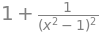

In [53]:
# Generamos una composición.
h(1 / (x**2 - 1))

## Expresiones.
Los símbolos y objetos que hemos introducido previamente constituyen los bloques fundamentales necesarios para formular expresiones matemáticas. En **Sympy**, las expresiones matemáticas se representan por medio de árboles donde las hojas son los símbolos y los nodos son instancias de clases que representan operaciones matemáticas. Algunos ejemplos de estas clases son `sympy.Add`, `sympy.Mul` y `sympy.Pow`, y que corresponden a las operaciones básicas de suma, multiplicación y exponenciación. Otros ejemplos de operaciones analíticas de mayor complejidad son `sympy.Sum`, `sympy.Product`, `sympy.Integral` y `sympy.Derivative`, que corresponden a la sumatoria, producto, integrales y derivadas.

Consideremos, por ejemplo, la expresión matemática $1+2x^{2}+3x^{3}$. Para representar dicha expresión en **Sympy**, simplemente creamos el símbolo $x$ y luego escribimos esta expresión por medio de un código de Python sencillo:

In [54]:
# Creamos la variable simbólica x.
x = sympy.Symbol("x")

In [55]:
# Construimos nuestra expresión.
d = 1 + 2 * x**2 + 3 * x**3

In [56]:
# Mostramos en pantalla nuestra expresión.
d

En el código anterior, la expresión `d` es una instancia de `sympy.Add` constituida por las subexpresiones `1`, `2 * x**2` y `3 * x**3`. El árbol de cómputo que representa esta expresión se ilustra en la Fig. (2.1). Notemos que no es necesario construir de manera explícita este árbol, ya que éste se genera de manera automática a partir de la expresión y sus correspondientes operadores. Sin embargo, para entender cómo **Sympy** trabaja las expresiones matemáticas, es importante saber cómo éstas se representan.

<p style="text-align: center;"><img src="figures/fig_2_1.png" width="600"></p>
<p style="text-align: center;">Fig. (2.1): Árbol que representa la expresión del bloque de código anterior</p>

Cualquier árbol de cómputo puede recorrerse explícitamente usando el atributo `args`, y que es provisto por todos los símbolos y operadores de **Sympy**. Para el caso de un operador, el atributo `args` retorna una tupla de subexpresiones que se combinan conforme la regla implementada por la clase que define al correspondiente operador. Para el caso de un símbolo, el atributo `args` retorna una tupla vacía, lo que significa que éste representa una hoja en un árbol de cómputo.

En el siguiente bloque de código se muestra como podemos acceder de manera explícita a un árbol de cómputo:

In [57]:
# Todos los elementos del árbol.
d.args

In [58]:
# Segunda expresión.
d.args[1]

In [59]:
# Subexpresiones que conforman la expresión anterior.
d.args[1].args

In [60]:
# Subexpresiones de la segunda subexpresión anterior.
d.args[1].args[1].args

In [61]:
# Las expresiones anteriores constituyen hojas del árbol completo.
d.args[1].args[1].args[1].args

En el uso común de **Sympy**, raramente será necesario manipular de forma explícita árboles de cómputo, pero cuando los métodos que permiten la manipulación de expresiones completas, y que veremos a continuación, no sean suficientes a la hora de resolver un problema, será útil implementar funciones definidas por nosotros que naveguen por los árboles de cómputo y permitan manipularlo, usando el argumento `args`.

## Manipulación de expresiones.
La manipulación de árboles de cómputo es uno de los trabajos fundamentales de **Sympy**, existiendo una amplia gama de funciones disponibles para la implementación de varios tipos de transformaciones. La idea general es que los árboles subyacentes pueden ser transformados en objetos matemáticamente equivalentes por medio de simplificaciones y reescritura de funciones. Tales funciones, en general, crean nuevas expresiones modificadas a partir de las originales. De esta manera, es buena idea considerar a las expresiones de **Sympy** como objetos inmutables. De hecho, ese será el caso para todas las funciones que estudiaremos en esta sección y que interactuarán con expresiones de **Sympy**, retornando nuevos árboles de cómputo en vez de modificar los existentes.

### Simplificaciones.
La manipulación que más nos interesa implementar sobre una expresión matemática corresponde a la simplificación. Esta es, quizás, la operación más ambigua de todas las que podemos realizar, debido a que no es nada trivial el determinar, de forma algorítmica, si una expresión parece ser (o *es*) más simple que otra para un ser humano, y en general, no es muy obvio qué metodo(s) emplear para llegar a una expresión más simple. No obstante, la simplificación de tipo *black-box* de cualquier sistema de álgebra computacional, y **Sympy** incluye la función `sympy.simplify()`, que tiene como objetivo *intentar* simplificar una expresión dada utilizando una variedad de métodos y enfoques. La función de simplificación también puede invocarse por medio del método `simplify()`, como se ilustra en el siguiente ejemplo:

In [62]:
# Definimos una expresión.
d = 2 * (x**2 - x) - x * (x + 1)

In [63]:
# Mostramos en pantalla esta expresión.
d

In [64]:
# Simplificamos dicha expresión.
sympy.simplify(d)

In [65]:
# Notemos que la expresión anterior no se ha alterado.
d

Notemos que ambos, `sympy.simplify(d)` y `d.simplify()` retornan nuevos árboles de cómputo y no modifican en absoluto la expresión original definida por `d`, como mencionamios previamente. En este ejemplo, la expresión `d` puede simplificarse expandiendo los productos involucrados, cancelando términos y luego factorizando nuevamente la expresión. En general, la función `sympy.simplify()` *intentará* aplicar diversas estrategias de simplificación y, también, será capaz de simplificar expresiones que contengan funciones potenciales y trigonométricas. Por ejemplo:

In [66]:
# Definimos una nueva expresión.
e = 2 * sympy.cos(x) * sympy.sin(x)

In [67]:
# Mostramos esta expresión en pantalla.
e

In [68]:
# Simplificamos dicha expresión.
sympy.simplify(e)

In [69]:
# Definimos una nueva expresión.
f = sympy.exp(x) * sympy.exp(y)

In [70]:
# Mostramos esta expresión en pantalla.
f

In [71]:
# Simplificamos dicha expresión.
sympy.simplify(f)

Cada tipo de simplificación puede ser llevada a cabo mediante el uso de funciones más especializadas, tales como `sympy.trigsimp()` o `sympy.powsimp()`, para expresiones compuestas de funciones trigonométricas y potenciales/exponenciales, respectivamente. Estas funciones únicamente intervienen con subexpresiones del tipo asociado a la correspondiente simplificación. Un resumen de estas funciones de simplificación específicas para un determinado tipo de función (elemental, trascendente, algebraica, etc.) se muestra en la Tabla (2.3).

</p> <p style="text-align: center;">Tabla (2.3): Algunas funciones específicas de simplificación de Sympy</p>

| Función            | Descripción |
| :----------------- | :---------- |
| `sympy.simplify()` | Intenta aplicar varios métodos de simplificación para obtener una forma reducida de una expresión dada. |
| `sympy.trigsimp()` | Intenta simplificar una expresión por medio de identidades trigonométricas. |
| `sympy.powsimp()`  | Intenta simplificar una expresión por medio de la aplicación de leyes de potencias. |
| `sympy.compsimp()` | Intenta simplificar una expresión por medio de la aplicación de identidades combinatorias. |
| `sympy.ratsimp()`  | Intenta simplificar una expresión por medio del uso denominadores comunes. |

### Expansiones.
Cuando la simplificación de tipo black-box provista por la función `sympy.simplify()` no produce resultados satisfactorios, con frecuencia es posible conseguir progresos guiando manualmente a **Sympy** para que utilice operaciones algebraicas específicas. Una herramienta importante en este proceso es la expansión de ciertas expresiones de diversas maneras. La función `sympy.expand()` permite generar varios tipos de expansiones, dependiendo de los valores de algunos argumentos propios de esta función. Por defecto, `sympy.expand()` distribuye sumas con respecto a multiplicaciones, construyendo expresiones totalmente desarrolladas. Por ejemplo, un producto de binomios como $(x+1)(x+2)$ puede expandirse a $x^{2}+3x+2$ en **Sympy** como sigue:

In [72]:
# Construimos la expresión anterior.
h = (x + 1) * (x + 2)

In [73]:
# Y la expandimos algebraicamente.
sympy.expand(h)

Uno de los argumentos de la función `sympy.expand()` es `mul`, el cual corresponde a un valor Booleano que permite establecer si expandiremos productos existentes en las correspondientes expresiones (como en el ejemplo anterior). Por otro lado, el argumento Booleano `trig` permite expandir expresiones trigonométricas:

In [74]:
# Una expresión trigonométrica.
g = sympy.tan(x + y)

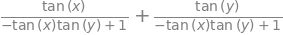

In [75]:
# Intentamos expandir esta expresión.
sympy.expand(g, trig=True)

También disponemos del argumento Booleano `log`, válido para expresiones logarítmicas:

In [76]:
# Definimos primeramente un par de símbolos.
alpha, beta, gamma, delta = sympy.symbols(r"\alpha, \beta, \gamma, \delta", positive=True)

In [77]:
# Una expresión logarítmica.
h = sympy.log((alpha**gamma)*beta) + sympy.log(sympy.sqrt(delta))

In [78]:
# Mostramos en pantalla esta expresión.
h

In [79]:
# Intentamos expandir esta expresión.
sympy.expand(h, log=True)

También es posible usar el argumento Booleano `complex` para separar las partes real e imaginaria de un número complejo:

In [80]:
# Definimos dos números complejos.
z1 = sympy.exp(alpha + sympy.I * beta)
z2 = sympy.exp(gamma - sympy.I * delta)

In [81]:
# Mostramos estos números en pantalla.
(z1, z2)

In [82]:
# Expandimos estas expresiones.
z1.expand(complex=True)

In [83]:
z2.expand(complex=True)

### Factorizaciones.
Un patrón común de uso para la función `sympy.expand()` al expandir expresiones, es dejar que **Sympy** cancele ciertos términos y luego factorice o combine la expresión nuevamente. La función `sympy.factor()` intenta factorizar una expresión tanto como sea posible y, en cierto sentido, lo contrario a la función `sympy.expand()` con `mul=True`. Podemos factorizar expresiones algebraicas como sigue:

In [84]:
# Definimos una expresión algebraica.
e = x**2 - 13*x + 42

In [85]:
# Mostramos esta expresión en pantalla.
e

In [86]:
# Factorizamos esta expresión.
sympy.factor(e)

Existen, igualmente, funciones de factorización específicas para ciertos tipos de expresiones. Por ejemplo, para el caso de expresiones logarítmicas, podemos utilizar la función `sympy.logcombine()`:

In [87]:
# Definimos una expresión logarítmica sencilla.
f = sympy.log(alpha) - sympy.log(beta) + delta * sympy.log(gamma)

In [88]:
# Mostramos esta expresión en pantalla.
f

In [89]:
# Reducimos esta expresión.
sympy.logcombine(f)

Cuando trabajamos con expresiones matemáticas, con frecuencia resulta necesario tener un cierto nivel de control sobre los tipos de factorización que implementamos. El método `collect()` permite factorizar los términos de una expresión que contengan una variable simbólica dada (o una lista de este tipo de variables). Por ejemplo, la expresión $x^{2}y + 2xy - zy + x^{2}yz^{2}$ no puede ser completamente factorizada, pero sí podemos obtener factores parciales para $x$ e $y$:

In [90]:
# Definimos nuestra expresión.
g = x**2*y + 2*x*y - z*y + x**2*y*z**2

In [91]:
# Mostramos esta expresión en pantalla.
g

In [92]:
# Factorizamos parcialmente esta expresión.
g.collect(x)

In [93]:
g.collect(y)

Pasando una lista de símbolos o expresiones a la función `sympy.collect()` o al método `collect()`, podemos generar varias factorizaciones parciales de una sola vez. Además, cuando usamos el método `collect()`, podemos encadenar otros métodos:

In [94]:
# Definimos una expresión vía funciones trignométricas.
h = sympy.cos(x + y) + sympy.sin(x - y)

In [95]:
# Mostramos esta expresión en pantalla.
h

In [96]:
# Encandenamos varios métodos de expansión y factorización.
h.expand(trig=True).collect([sympy.cos(x), sympy.sin(y)]).collect(sympy.cos(y) - sympy.sin(y))

### Descomposiciones.
El último tipo de factorización que revisaremos en **Sympy** guarda relación con el tratamiento de fracciones (o, más general, *funciones racionales*). Las funciones `sympy.apart()` y `sympy.together()` permiten, respectivamente, descomponer una función racional en fracciones parciales y combinar varias fracciones parciales en una única función racional:

In [97]:
# Construimos una expresión racional.
r = 1 / (x**3 + 4*x - 5)

In [98]:
# Mostramos esta expresión en pantalla.
r

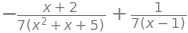

In [99]:
# Descomponemos esta expresión en fracciones parciales.
sympy.apart(r)

In [100]:
# Construimos una nueva expresión compuesta por la suma de fracciones parciales.
q = (1 / (x**2 + x + 1)) - (1 / (x - 1)) + (1 / (x + 1))

In [101]:
# Mostramos esta expresión en pantalla.
q

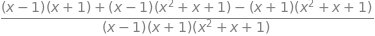

In [102]:
# Reunimos todo en una única función racional.
sympy.together(q)

## Sustituciones.
Previamente nos hemos enfocado en la manipulación de expresiones algebraicas y funcionales mediante el uso de técnicas de simplificación y factorización que, en definitiva, permiten reescribir tales expresiones conforme otras más simples (o más generales). Sin embargo, otro tipo común de manipulación de este tipo de expresiones corresponde a la sustitución de ciertas variables simbólicas (o una subexpresión constituida por varias de estas variables) dentro de una expresión. Por ejemplo, es posible que queramos realizar una sustitución que consiste en un cambio de variables o similar. En **Sympy** hay dos métodos para llevar a cabo sustituciones de este tipo: `subs()` y `replace()`. Usualmente, la alternativa más adecuada es `subs()`, pero `replace()` puede ofrecernos opciones mejores en algunos casos, como aquellos donde los reemplazos se definen en base a caracteres comodines.

El caso más simple de uso del método `subs()` es cuando éste se llama a partir de una expresión. En este caso, el símbolo a reemplazar (digamos `x`) corresponde al primer argumento que imputamos, seguido del símbolo a usar como reemplazo (`y`). Como resultado, todas las ocurrencias de `x` son reemplazadas por `y`:

In [103]:
# Definimos una expresión.
e = x**2 + 2*x*y + y**2

In [104]:
# Mostramos en pantalla esta expresión.
e

In [105]:
# Reemplazamos x por y.
e.subs(x, y)

In [106]:
# En este otro ejemplo, usamos funciones trigonométricas y exponenciales.
f = sympy.sin(x + y) + sympy.exp(x*y)

In [107]:
# Mostramos en pantalla esta expresión.
f

In [108]:
# Reemplazamos y por x.
f.subs(y, x)

En vez de encadenar varios reemplazos, cuando se requiera realizar sustituciones de más de una variable en una expresión dada, podemos utilizar un diccionario que mapee las variables a reemplazar:

In [109]:
# Construimos una expresión algebraica basada en coordenadas cartesianas.
x, y, z = sympy.symbols("x, y, z", positive=True, real=True)
e = x**2 + y**2 + z**2

In [110]:
# Definimos algunas variables para reemplazar.
r, theta = sympy.symbols(r"r, \theta", real=True, positive=True)

In [111]:
# Mostramos nuestra expresión en pantalla.
e

In [112]:
# Generamos un reemplazo conforme coordenadas cilíndricas y simplificamos.
e.subs({x: r*sympy.cos(theta), y: r*sympy.sin(theta)}).trigsimp()

Una aplicación típica del método `subs()` corresponde a la sustitución de variables simbólicas por valores numéricas, a fin de evaluar rápidamente expresiones completas:

In [113]:
# Una expresión simbólica.
f = x**2 + 2*x*y + x*z**2 + z*3

In [114]:
# Mostramos en pantalla esta expresión.
f

In [115]:
# Evaluamos esta expresión en (x, y, z) = (1, 2, 4).
f.subs({x: 1, y: 2, z: 4})

## Evaluación numérica de expresiones simbólicas.
Incluso a pesar de que trabajemos con matemáticas simbólicas, será inevitable que tarde o temprano evaluemos las correspondientes expresiones numéricamente. Una expresión simbólica de **Sympy** puede evaluarse ya sea por medio de la función `sympy.N()` o mediante el método `evalf()`, a partir de una expresión dada:

In [116]:
# Evaluamos una expresión.
sympy.N(1 + sympy.pi)

In [117]:
# Generamos un resultado con 50 cifras decimales significativas.
sympy.N(1 + sympy.pi, 50)

In [118]:
# Evaluamos ahora mediante el método evalf() con 10 cifras decimales significativas.
(1 + sympy.pi).evalf(10)

Cuando necesitamos evaluar numéricamente una expresión para un rango de valores de entrada, podemos, en primera instancia, construir un loop de evaluación (por ejemplo, mediante una expresión generadora de Python) y realizar llamadas sucesivas del método `evalf()`:

In [119]:
# Construimos una expresión.
f = sympy.sin(sympy.pi * x + 1/sympy.exp(x**2))

In [120]:
# Mostramos esta expresión en pantalla.
f

In [121]:
# Generamos una compresión de lista para evaluar esta expresión en varios valores de x.
[f.subs(x, xj).evalf(4) for xj in range(10)]

La evaluación anterior es práctica y sencilla, pero lenta:

In [122]:
%timeit [f.subs(x, xj).evalf(4) for xj in range(10)]

1.1 ms ± 5.08 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**Sympy** nos provee de un método más adecuado para la evaluación numérica de expresiones simbólicas, y que corresponde a la función `sympy.lambdify()`. Dicha función toma como argumentos un conjunto de variables simbólicas (libres) y una expresión determinada, generando de esta manera un eficiente evaluador que nos retornará el valor numérico de la expresión, siempre que le imputemos el valor respecto del cual se realiza la evaluación. Por ejemplo:

In [123]:
# Valor a construir un evaluador para la expresión anterior.
f_eval = sympy.lambdify(x, f)

In [124]:
# Evaluamos la función anterior en x = 1.
f_eval(1)

In [125]:
# Y podemos generar evaluaciones sucesivas.
[f_eval(xj) for xj in range(10)]

Esta función es extremadamente eficiente en términos de tiempo de ejecución:

In [126]:
%timeit [f_eval(xj) for xj in range(10)]

33.7 µs ± 260 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


¡Más de 30 veces más rápida que simplemente evaluar vía el método `evalf()`!

Notemos que las evaluaciones numéricas retornan valores escalares propios de **Sympy** que no son directamente compatibles con librerías que manipulen datos numéricos de precisión fija (como **Numpy** y derivados). Sin embargo, **Sympy** nos permite generar funciones vectorizadas que sean compatibles con **Numpy** simplemente pasando el argumento `"numpy"` en la función `sympy.lambdify()`. De esta manera, los evaluadores resultantes podrán recibir arreglos de **Numpy** como argumentos de entrada, aprovechando la velocidad de esta librería (ya que está escrita en C) para la evaluación de expresiones para grandes cantidades de datos:

In [127]:
# Creamos un evaluador vectorizado compatible con Numpy.
f_eval = sympy.lambdify(x, f, "numpy")

In [128]:
# Importamos Numpy.
import numpy as np

In [129]:
# Generamos un arreglo de valores que evaluaremos.
values = np.linspace(start=0, stop=99, num=100)

In [130]:
# Evaluamos la expresión para todos estos valores.
[f_eval(xj) for xj in values]

## Aplicaciones al cálculo diferencial.
Hasta ahora, hemos estudiado como representar expresiones matemáticas en **Sympy**, manipular tales expresiones, simplificarlas, expandirlas, factorizarlas y evaluarlas numéricamente. Con todas estas funcionalidades en consideración, ya estamos listos para explorar las herramientas que nos brinda **Sympy** en una de las ramas fundamentales del análisis matemático: El cálculo diferencial. Y que, como bien hemos sido testigos en nuestras carreras, es esencial en todo tipo de problemas físicos y de ingeniería.

Como bien sabemos de nuestros cursos de cálculo, el elemento base del cálculo diferencial corresponde a la derivada, que a su vez es un operador lineal que permite describir la tasa de cambio de una función dada en el entorno de un punto perteneneciente a su dominio. En **Sympy**, podemos calcular la derivada de una función (simbólica, insistimos) mediante el uso de la función `sympy.diff()`, o bien, usando el opersdor `diff()`, que es directamente aplicable sobre expresiones simbólicas. El argumento, en cualquiera de los dos casos, corresponde a una determinada variable simbólica o conjunto de ellas, y que por supuesto serán aquellas variables respecto de las cuales calcularemos la(s) derivada(s) de interés. Por ejemplo, para representar la primera derivada de una función $f$ en el punto arbitrario $x$, lo que denotamos como $f'(x)$ o $df/dx$, tendremos que:

In [131]:
# Definimos una función (arbitraria) de la variable simbólica x.
f = sympy.Function("f")(x)

In [132]:
# Expresamos la primera derivada de esta función.
sympy.diff(f)

Y eso es todo (a nivel simbólico). Podemos representar derivadas de orden superior de forma igualmente sencilla, simplemente repitiendo el símbolo respecto del cual derivamos (`x` en el ejemplo anterior), o equivalentemente, especificando un número entero luego del símbolo respecto del cual derivamos, y que define el orden de la derivada:

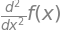

In [133]:
# Derivada de segundo orden.
sympy.diff(f, x, 2)

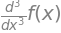

In [134]:
# Derivada de segundo orden.
sympy.diff(f, x, 3)

Podemos representar derivadas parciales de manera sencilla considerando funciones multivariables, especificando las variables simbólicas respecto de las cuales derivamos. Por ejemplo, definimos primeramente una función arbitraria $g(x, y)$:

In [135]:
# Función de dos variables g(x, y).
g = sympy.Function("g")(x, y)

Podemos representar las derivadas parciales $\displaystyle \frac {\partial g}{\partial x}$ y $\displaystyle \frac{\partial g}{\partial y}$ fácilmente en **Sympy** escribiendo:

In [136]:
# Derivada parcial de g(x, y) con respecto a x.
g.diff(x)

In [137]:
# Derivada parcial de g(x, y) con respecto a y.
g.diff(y)

Para el caso de las derivadas parciales de orden superior, la sintaxis es bastante sencilla:

In [138]:
# Derivada parcial mixta (de segundo orden) con respecto a x e y.
g.diff(x, y)

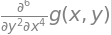

In [139]:
# Derivada parcial de orden 4 en x y de orden 2 en y (orden 6 en general).
g.diff(x, 4, y, 2)

Los ejemplos anteriores consideran únicamente funciones arbitrarias (que no tienen un cuerpo definido). Naturalmente, es posible evaluar las derivadas de funciones bien definidas y de expresiones simbólicas, obteniendo igualmente las expresiones que representan las derivadas de tales funciones y expresiones. Por ejemplo, usando la función `sympy.diff()` podemos evaluar fácilmente las derivadas de cualquier expresión:

In [140]:
# Una expresión polinómica.
e = 4*x**6 + 2*x**3 - x**2 + 3*x - 6

In [141]:
# Mostramos esta expresión en pantalla.
e

In [142]:
# Obtenemos la derivada de la expresion anterior.
e.diff(x)

In [143]:
# Una expresión racional.
r = (x + 1) / (x**2 + x - 1) + (12 / (x**3 - 2*x**2 + 4*x - 3)) + 4 / (x**2 + 1)

In [144]:
# Mostramos esta expresión en pantalla.
r

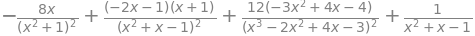

In [145]:
# Obtenemos la derivada de la expresión anterior.
r.diff(x)

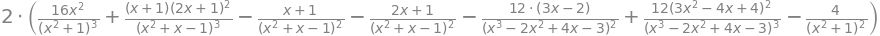

In [146]:
# Y también la segunda derivada.
r.diff(x, 2)

In [147]:
# Una expresión que combina funciones logarítmicas y trigonométricas.
f = (1 / sympy.log(x**2 + 1)) + sympy.exp(-x**2) * sympy.tan((x**2 - 1)**2) - 1/(sympy.sin(x**2) + sympy.cos(x**2))

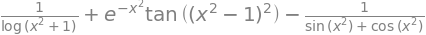

In [148]:
# Mostramos esta expresión en pantalla.
f

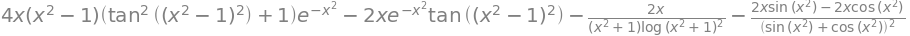

In [149]:
# Obtenemos la derivada de la expresión anterior.
f.diff(x)

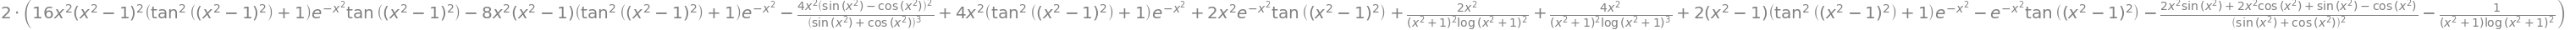

In [150]:
# Y también la segunda derivada.
f.diff(x, 2)

Los cálculos de derivadas también pueden extenderse fácilmente a expresiones multivariables:

In [151]:
# Una expresión de dos variables (x e y).
t = sympy.sin(x**2 - y**2)*sympy.tan(1 + x*y)/(sympy.sin(1 + 1/(x*y)**2))

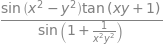

In [152]:
# Mostramos esta expresión en pantalla.
t

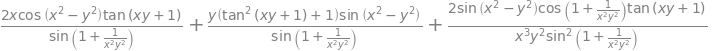

In [153]:
# Derivada parcial con respecto a x.
t.diff(x)

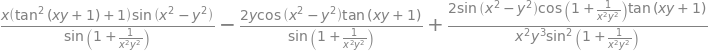

In [154]:
# Derivada parcial con respecto a y.
t.diff(y)

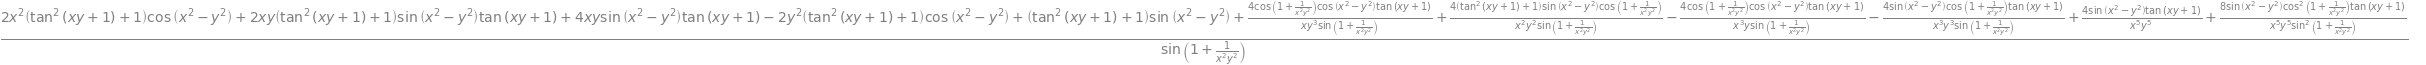

In [155]:
# Derivada parcial mixta de segundo orden respecto de x e y.
t.diff(x, y)

Las derivadas suelen ser fáciles de computar, y la función `sympy.diff()` debiera ser capaz de evaluar la derivada de la mayoría de las funciones estándar que pueden definirse por medio del uso de **Sympy**.

Notemos que, en los ejemplos anteriores, el uso del método `diff()` sobre una expresión arbitraria resulta en una nueva expresión. Si, en vez de ello, queremos representar simbólicamente la derivada de una expresión bien definida, podemos crear una instancia de la clase `sympy.Derivative`, pasando la correspondiente expresión como el primer argumento, seguida de las variables simbólicas respecto de las cuales queremos calcular la respectiva derivada:

In [156]:
# Generamos una instancia de la derivada para la expresión f.
d = sympy.Derivative(f, x)

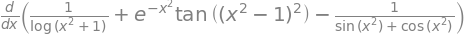

In [157]:
# Mostramos esta instancia.
d

Esta representación formal de la derivada `d` puede luego evaluarse usando el método `doit()`, que es propio de la clase `sympy.Derivative`:

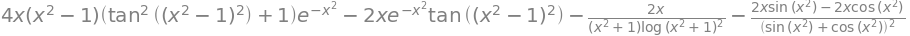

In [158]:
# Evaluamos la derivada.
d.doit()

In [159]:
# Efectivamente, hemos llegado al mismo resultado.
f.diff(x) is d.doit()

True

El patrón anterior de evaluación, en cierta forma retardado, es muy frecuente en **Sympy**. Esto sucede precisamente porque muchas expresiones pueden ser factibles de ser simplificadas antes de ser evaluadas de forma directa.

## Aplicaciones al cálculo integral
Por supuesto, en **Sympy** también es posible evaluar integrales. Para ello, podemos hacer uso de la función `sympy.integrate()` para evaluar la integral de una expresión arbitraria con respecto a una determinada variable, o bien, podemos expresar formalmente una integral por medio de la clase `sympy.Integral` (pudiendo evaluar la integral correspondiente mediante el método `doit()`, de la misma forma que lo hacemos con las derivadas). Las integrales, como en el caso simbólico, pueden ser definidas o indefinidas, dependiendo si existe un intervalo o región de integración o no. En el primer caso, el resultado de una integral es un valor numérico que puede representar un área en el caso unidimensional, un volumen en el caso bidimensional, y así sucesivamente. En el segundo caso, el resultado es una expresión que típicamente se denomina *antiderivada* de la expresión que integramos. Cualquiera sea el tipo de integral, **Sympy** puede manejar ambos mediante la función `sympy.integrate()`.

Si hacemos uso de la función `sympy.integrate()` únicamente con una determinada expresión como argumento, **Sympy** computará la correspondiente integral indefinida de dicha expresión. Por otro lado, podemos computar una integral definida si, adicionalmente, pasamos una tupla a la función `sympy.integrate()` de la forma `(x, a, b)`, donde `x` es la variable respecto de la cual integramos, mientras que `a` y `b` representan los límites de integración en el caso unidimensional. Para una función de una variable $f(x)$, las correspondientes integrales (definida e indefinida) se computan como sigue:

In [160]:
# Definimos todas las variables simbólicas a utilizar.
a, b, x = sympy.symbols("a, b, x", real=True)

In [161]:
# Definimos la función f(x).
f = sympy.Function("f")(x)

In [162]:
# Expresamos la integral indefinida de f.
f.integrate(x)

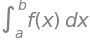

In [163]:
# Expresamos la integral de f sobre el intervalo cerrado [a, b].
sympy.integrate(f, (x, a, b))

Por supuesto, cuando estos métodos se aplican sobre funciones bien definidas, las integran se evalúan conforme dichas definiciones:

In [164]:
# Definimos una expresión.
g = (x**3 + 2*x - 1) / (x**4 - 1)

In [165]:
# Mostramos esta expresión en pantalla.
g

In [166]:
# Calculamos la integral indefinida de la expresión anterior.
g.integrate(x)

In [167]:
# Calculamos la integral de la expresion anterior, definida sobre el intervalo [a, b].
sympy.integrate(g, (x, a, b))

También es posible definir límites de integración de forma explícita, incluso usando expresiones como $+\infty$ o $-\infty$:

In [168]:
# Definimos la expresión que vamos a integrar.
h = 1 / (1 + x**2 + x**4 + x**6)

In [169]:
# Mostramos la expresión en pantalla.
h

In [170]:
# Calculamos la integral de la expresion anterior, definida sobre el intervalo [0, +∞].
sympy.integrate(h, (x, 0, sympy.oo))

In [171]:
# Definimos otra expresión.
p = 1 / (1 + x**4)

In [172]:
# Mostramos esta expresión en pantalla.
p

In [173]:
# Calculamos la integral definida sobre el intervalo cerrado [a, b].
sympy.integrate(p, (x, 0, sympy.oo))

A diferencia de las derivadas, el problema de calcular una integral simbólicamente es, en general, muy difícil, y **Sympy** no será capaz de calcular *cualquier* integral que presentemos. Cuando ésto ocurra, **Sympy** retornará una instancia de `sympy.Integral` representando formalmente la integral requerida. Por ejemplo:

In [174]:
# Un ejemplo de integral que Sympy, en primera instancia, no es capaz de calcular.
sympy.integrate(sympy.sin(x * sympy.cos(x)))

También es posible evaluar expresiones multivariables, siempre que especifiquemos la variable respecto de la cual calculamos la integral:

In [175]:
# Una expresión multivariable.
q = (1 - x*y) / (x**2 + 2*x*y + y**2)

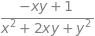

In [176]:
# Mostramos esta expresión en pantalla.
q

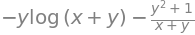

In [177]:
# Calculamos la integral con respecto a x.
sympy.integrate(q, x)

In [178]:
# Calculamos la integral con respecto a y.
sympy.integrate(q, y)

También es posible calcular integrales múltiples mediante el uso de la función `sympy.integrate()`, aunque por el momento nos ahorraremos esta discusión, hasta que revisemos implementaciones de **Sympy** para resolver ecuaciones, y que son muy útiles para calcular intersecciones entre curvas, superficies y volúmenes.

## Aplicaciones a series numéricas.
Las series constituyen un aspecto fundamental del cálculo en términos de procesos infinitos y son aplicables a una serie de problemas de ingeniería (sobretodo en fenómenos peródicos). Las expansiones en serie permiten que una función arbitraria pueda escribirse como una suma (infinita) de términos que, con frecuencia, son más simples. Por ejemplo, toda función $f:I\subseteq \mathbb{R} \rightarrow \mathbb{R}$ definida en un intervalo abierto $I$ de $\mathbb{R}$, $n$ veces diferenciable en $I$, puede expandirse en la forma de un polinomio con infinitos sumandos, en un entorno centrado en un punto $x_{0}\in I$, y que puede escribirse como:

$$T_{n}\left( x\right)  :=\displaystyle \sum^{+\infty}_{n=0} \frac{f^{\left( n\right)  }\left( x_{0}\right)  }{n!} \left( x-x_{0}\right)^{n}$$
</p> <p style="text-align: right;">$(2.1)$</p>

Donde $f^{\left( n\right)}$ denota la derivada de orden $n$ de $f$. La serie así definida se conoce como expansión (o serie) de Taylor de $f$ centrada en $x_{0}$.

Si truncamos la serie de Taylor en $k$ sumandos, obtendremos una aproximación de $f$ de orden $k$.En **Sympy**, la expansión en serie de Taylor de una función o de una expresión dada puede computarse mediante el uso de la función `sympy.series()`, o bien, el método `series()` aplicable a cualquier expresión de **Sympy**. El primer argumento de esta función es una función o expresión que deseamos expandir en serie, seguida de un símbolo que representa la variable respecto de la cual se construye la serie (y que puede omitirse para el caso de funciones o expresiones univariables). En adición, también es posible establecer el punto que define el entorno respecto del cual se construye la serie usando el argumento `x0` (que por defecto es igual a cero). También podemos especificar el orden de la expansión mediante el argumento `n` (que por defecto es igual a `6`):

In [179]:
# Definimos las variables simbólicas que vamos a utilizar.
x, y = sympy.symbols("x, y")

In [180]:
# Definimos una función de la variable x.
f = sympy.Function("f")(x)

In [181]:
# Construimos la expansión en serie de f, en torno a x0 = 0.
sympy.series(f, x)

                             ⎛  2      ⎞│         ⎛  3      ⎞│         ⎛  4   
                           2 ⎜ d       ⎟│       3 ⎜ d       ⎟│       4 ⎜ d    
                          x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(
                             ⎜  2      ⎟│         ⎜  3      ⎟│         ⎜  4   
         ⎛d       ⎞│         ⎝dξ       ⎠│ξ=0      ⎝dξ       ⎠│ξ=0      ⎝dξ    
f(0) + x⋅⎜──(f(ξ))⎟│    + ────────────────── + ────────────────── + ──────────
         ⎝dξ      ⎠│ξ=0           2                    6                    24

   ⎞│         ⎛  5      ⎞│           
   ⎟│       5 ⎜ d       ⎟│           
ξ))⎟│      x ⋅⎜───(f(ξ))⎟│           
   ⎟│         ⎜  5      ⎟│           
   ⎠│ξ=0      ⎝dξ       ⎠│ξ=0    ⎛ 6⎞
──────── + ────────────────── + O⎝x ⎠
                  120                

In [182]:
# Definimos una expresión.
e = sympy.log(1 + x)

In [183]:
# Obtenemos el polinomio de Taylor de la expresión anterior de orden 8 en torno a x0 = 1.
e.series(x, x0=1, n=8)

Por supuesto, `x0` puede ser una variable simbólica:

In [184]:
# Definimos x0.
x0 = sympy.Symbol("x_0", int=True, positive=True)

In [185]:
# Construimos el polinomio de Taylor de cuarto orden de la función tangente en torno a x0.
sympy.series(sympy.tan(x), x, n=4, x0=x0)

Notemos que **Sympy** expresa el último del polinomio de Taylor haciendo uso de la notación "O grande" de Landau, la cual puede definirse como sigue: Para dos funciones $f$ y $g$ definidas en un entorno de un punto $x_{0}$ dentro del dominio de ambas funciones, diremos que $f=\mathcal{O}(g)$, cuando $x\rightarrow x_{0}$, si y sólo si existe un número real $\epsilon>0$ tal que $|f(x)|\leq \epsilon|g(x)|$ para todo $x$ en un entorno de $x_{0}$.

Es posible evaluar numéricamente el valor de una expansión de Taylor removiendo el término de Landau correspondiente, usando el método `removeO()`:

In [186]:
# Remoción simbólica del término de Landau de una serie.
sympy.series(f, x).removeO()

   ⎛  5      ⎞│         ⎛  4      ⎞│         ⎛  3      ⎞│         ⎛  2      ⎞│
 5 ⎜ d       ⎟│       4 ⎜ d       ⎟│       3 ⎜ d       ⎟│       2 ⎜ d       ⎟│
x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(ξ))⎟│
   ⎜  5      ⎟│         ⎜  4      ⎟│         ⎜  3      ⎟│         ⎜  2      ⎟│
   ⎝dξ       ⎠│ξ=0      ⎝dξ       ⎠│ξ=0      ⎝dξ       ⎠│ξ=0      ⎝dξ       ⎠│
────────────────── + ────────────────── + ────────────────── + ───────────────
       120                   24                   6                    2      

                             
                             
                             
                             
ξ=0     ⎛d       ⎞│          
─── + x⋅⎜──(f(ξ))⎟│    + f(0)
        ⎝dξ      ⎠│ξ=0       

Podemos, además, construir series arbitrarias usando la clase `sympy.Sum`, que nos permite definir sumas sobre un rango de valores bien definido. Por ejemplo:

In [187]:
# Definimos una variable simbólica entera para trabajar cualquier serie.
n = sympy.Symbol("n", integer=True, positive=True)

In [188]:
# Construimos una expresión que equivale a una serie armónica.
s = sympy.Sum(1 / (n**2), (n, 1, sympy.oo))

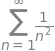

In [189]:
# Mostramos esta serie en pantalla.
s

In [190]:
# Calculamos el resultado de la serie mediante el método doit().
s.doit()

## Resolución de ecuaciones.
La resolución de ecuaciones es un aspecto fundamental de las matemáticas, siendo aplicable en casi todas las ramas de la misma, lo que por supuesto incluye a cualquier rama de la ciencia y la ingeniería. **Sympy** es capaz de resolver simbólicamente una gran variedad de ecuaciones, aunque en general la mayoría de las igualdades a las que podemos vernos enfrentados en la práctica son tengan una solución algebraicamente cerrada. Sin embargo, para cualquier ecuación (o sistema de ecuaciones) que disponga de una solución analítica, es muy probable que **Sympy** pueda hallar su solución. En caso de no ser así, los métodos numéricos (que veremos más adelante) serán nuestra única opción.

En su forma más simple, la resolución de ecuaciones involucrará una única ecuación con una única variable y sin parámetros adicionales. Un ejemplo de ésto es la ecuación de segundo grado, en la cual queremos hallar las raíces de un polinomio de segundo grado; es decir, $ax^{2} + bx + c = 0$, para $a, b, c\in \mathbb{R}$ y $a\neq 0$. Para una ecuación de estas características, podemos usar la función `sympy.solve()` para encontrar su solución:

In [191]:
# Definimos la variable libre para nuestra ecuación.
x = sympy.Symbol("x")

In [192]:
# Definimos la expresión que igualaremos a cero para luego resolverla.
e = x**2 - 4*x + 1

In [193]:
# Resolvemos la ecuación e = 0.
sympy.solve(e, x)

Vemos pues que **Sympy** ha resuelto correctamente la ecuación $x^{2}-4x+1=0$, siendo sus soluciones $x_{1}=2-\sqrt{3}$ y $x_{2}=2+\sqrt{3}$.

Por cierto, podemos resolver cualquier ecuación con solución algebraica cerrada. Por ejemplo, una ecuación de tercer grado:

In [194]:
# Definimos la expresión de tercer grado.
e = 3*x**3 - 6*x**2 + 2*x + 1

In [195]:
# Resolvemos la ecuación e = 0.
sympy.solve(e, x)

Nuevamente, **Sympy** no tuvo problemas para encontrar las raíces de la ecuación $3x^{3}-6x^{2}+2x+1=0$, que son $x_{1}=1$, $x_{2}=\frac{1}{2}-\frac{\sqrt{21}}{6}$ y $x_{3}=\frac{1}{2}+\frac{\sqrt{21}}{6}$.

Es posible incluir más variables libres en una ecuación, siempre ue especifiquemos la variable respecto de la cual deseamos resolver. Por ejemplo:

In [196]:
# Definimos algunas variables simbólicas adicionales.
a, b, c = sympy.symbols("a, b, c",)

In [197]:
# Resolvemos una ecuación general de segundo grado.
sympy.solve(a*x**2 + b*x + c, x)

Notemos que las soluciones encontradas son, efectivamente, las raíces de una ecuación general de segundo grado.

Las ecuaciones que queremos resolver no necesariamente serán polinómicas. Por ejemplo, podremos usar la función `sympy.solve()` para resolver ecuaciones de mayor complejidad, como sería el caso de ecuaciones trigonométricas:

In [198]:
# Definimos la expresión a resolver.
e = sympy.tan(x) - sympy.cot(x)

In [199]:
# Mostramos la expresión correspondiente.
e

In [200]:
# Resolvemos la ecuación e = 0.
sympy.solve(e, x)

O funciones logarítmicas y exponenciales:

In [201]:
# Definimos la expresión a resolver.
e = sympy.exp(1 + x**2) - 2 ** x

In [202]:
# Mostramos la expresión correspondiente.
e

In [203]:
# Resolvemos la ecuación e = 0.
sympy.solve(e, x)

Sin embargo, cuando tratamos con ecuaciones, en general, incluso para casos univariables, no es poco frecuente que nos encontremos con ecuaciones que no dispongan de soluciones algebraicamente cerradas, o bien, que **Sympy** sea incapaz de resolver. En algunos casos, **Sympy** retornará una solución formal, donde se especifican algunos aspectos de la misma. En otros casos, se levantarán errores donde que describen la carencia de implementación de algoritmos de solución adecuados:

In [204]:
# Solución expresada formalmente.
sympy.solve(x**5 - x**2 + 1, x)

In [205]:
# Error de no implementación.
try:
    sympy.solve(sympy.cos(1 + x**2) + x, x)
except NotImplementedError as e:
    print(e)

multiple generators [x, cos(x**2 + 1)]
No algorithms are implemented to solve equation x + cos(x**2 + 1)


La resolución de un sistema de ecuaciones para más de una variable en **Sympy** corresponde a una generalización directa del procedimiento explicado para el caso de ecuaciones simples. En vez de pasar una única expresión a la función `sympy.solve()`, pasamos una lista de expresiones que representan las ecuaciones del sistema. Por ejemplo, en el siguiente bloque de código, resolveremos el sistema lineal de ecuaciones

$$\begin{array}{rcl}2x_{1}+3x_{2}-6x_{3}&=&1\\ 4x_{1}-x_{2}+12x_{3}&=&-2\\ x_{1}-x_{2}+x_{3}&=&6\end{array}$$
</p> <p style="text-align: right;">$(2.2)$</p>

Luego:

In [206]:
# Definimos las variables del sistema.
x1, x2, x3 = sympy.symbols("x_1, x_2, x_3")

In [207]:
# Definimos las ecuaciones que conforman el sistema.
eq1 = 2*x1 + 3*x2 - 6*x3 - 1
eq2 = 4*x1 -x2 + 12*x3 + 2
eq3 = x1 - x2 + x3 - 6

In [208]:
# Resolvemos el sistema.
sympy.solve([eq1, eq2, eq3], [x1, x2, x3], dict=True)

Vemos pues que el sistema tiene solución única y **Sympy** no tuvo ningún problema en hallarla.

Por supuesto, no estamos limitados a sistemas de ecuaciones lineales. Veamos si podemos resolver el sistema no lineal:

$$\begin{array}{rll}x^{2}_{1}-x_{2}&=&0\\ -x_{1}+x^{2}_{2}&=&0\end{array}$$
</p> <p style="text-align: right;">$(2.3)$</p>

Luego tenemos:

In [209]:
# Definimos las ecuaciones que conforman el sistema.
eq1 = x1**2 - x2
eq2 = -x1 + x2**2

In [210]:
# Intentamos resolver este sistema.
sympy.solve([eq1, eq2], [x1, x2], dict=True)

Y efectivamente tiene un conjunto solución (aunque no todas ellas en $\mathbb{R}$).

**Ejemplo 2.1 - Cálculo del volumen de una intersección de superficies mediante integración múltiple:** Una aplicación inmediata de la solución de ecuaciones mediante **Sympy** corresponde al cálculo de volúmenes limitados por superficies. A continuación, calcularemos la integral

$$I=\iiint\limits_{\Omega } d\Omega$$
</p> <p style="text-align: right;">$(2.4)$</p>

Donde $\Omega$ representa el volumen encerrado por las superficies $S_{1}=\left\{ \left( x,y,z\right)  \in \mathbb{R}^{3} :x^{2}+y^{2}+z^{2}=b^{2}\right\}$ y $S_{2}=\left\{ \left( x,y,z\right)  \in \mathbb{R}^{3} :\frac{x^{2}}{a^{2}} +\frac{y^{2}}{b^{2}} +\frac{z^{2}}{c^{2}} =1\right\}$. Esto es, $\Omega$ es el volumen limitado por un elipsoide de semiejes $a, b$ y $c$, y una esfera de radio $b$, ambas centradas en el origen del espacio $\mathbb{R}^{3}$.

Para resolver este problema, primero definiremos las variables simbólicas que lo caracterizan:

In [211]:
# Definimos las variables del problema.
a, b, c = sympy.symbols('a, b, c')
x, y, z = sympy.symbols('x, y, z')

Y luego construimos expresiones que representan ambas superficies:

In [212]:
# Definimos las expresiones s1 y s2.
s1 = x**2 + y**2 + z**2 - b**2
s2 = (x**2/a**2) + (y**2/b**2) + (z**2/c**2) - 1

Determinamos los puntos de intersección entre ambas superficies:

In [213]:
# Puntos de intersección entre s1 y s2
intersection = sympy.solve((s1, s2), (x, y, z))

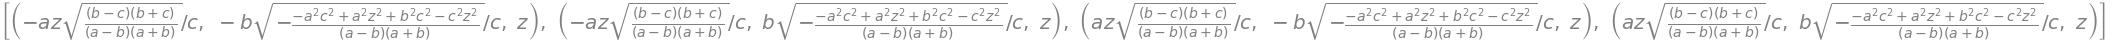

In [214]:
# Mostramos estos puntos en pantalla.
intersection

Y finalmente calculamos el volumen pedido:

In [215]:
volume = sympy.integrate(intersection[0][2], (y, -sympy.sqrt(b**2 - x**2), sympy.sqrt(b**2 - x**2)), (x, -a, a))

In [216]:
volume

⎧a                                                                            
⎪⌠                                                                            
⎪⎮  ⎧    ⎛                                                               2    
⎪⎮  ⎪    ⎜             ⅈ⋅b                      ⅈ⋅b                 3⋅ⅈ⋅x     
⎪⎮  ⎪2⋅z⋅⎜- ────────────────────────── - ───────────────── + ─────────────────
⎪⎮  ⎪    ⎜        ________     _______           _________             _______
⎪⎮  ⎪    ⎜       ╱      x     ╱     x           ╱       2             ╱       
⎪⎮  ⎪    ⎜  2⋅  ╱  -1 + ─ ⋅  ╱  1 + ─          ╱       x             ╱       x
⎪⎮  ⎪    ⎜    ╲╱        b  ╲╱       b    2⋅   ╱   -1 + ──    2⋅b⋅   ╱   -1 + ─
⎪⎮  ⎪    ⎜                                   ╱          2          ╱          
⎪⎮  ⎪    ⎝                                 ╲╱          b         ╲╱          b
⎪⎮  ⎪                                                                         
⎪⎮  ⎪                              ⎛        ________

## Aplicaciones al álgebra lineal.
La última implementación que veremos de **Sympy** corresponde al álgebra lineal, que a suvez es una rama de las matemáticas que resulta esencial en muchos aspectos de la ciencia y la computación científica, siendo la base fundamental de la enorme mayoría de las técnicas propias de modelamiento en machine learning.

Como bien sabemos, el álgebra lineal tiene varios elementos fundacionales que pueden resumirse, en general, en objetos matemáticos tales como vectores y transformaciones lineales. Ambos pueden expresarse por medio de matrices y, asu vez, en **Sympy**, las matrices pueden definirse por medio de la clase `sympy.Matrix`, usando un esquema de sintaxis muy similar al usado en **Numpy** para crear arreglos bidimensionales; es decir, cada fila de una matriz se expresa como una lista, y cada elemento de esta lista representa una columna determinada:

In [217]:
# Una matriz unidimensional.
sympy.Matrix([-1, 2, 0])

⎡-1⎤
⎢  ⎥
⎢2 ⎥
⎢  ⎥
⎣0 ⎦

In [218]:
# Una matriz con 5 filas y 5 columnas.
sympy.Matrix([
    [-1, 0, 2, -4, 3],
    [-3, 4, -5, 0, 1],
    [1, -3, -3, 8, 0],
    [0, 0, -2, -1, 3],
    [1, -1, 2, 5, -6]
])

⎡-1  0   2   -4  3 ⎤
⎢                  ⎥
⎢-3  4   -5  0   1 ⎥
⎢                  ⎥
⎢1   -3  -3  8   0 ⎥
⎢                  ⎥
⎢0   0   -2  -1  3 ⎥
⎢                  ⎥
⎣1   -1  2   5   -6⎦

Al igual que en **Numpy**, es posible construir algunas rutinas que permitan definir matrices *prefabricadas*. Para ello, podemos pasar a la clase `sympy.Matrix` el número de filas y columnas de la matriz, y una función anónima que describa cómo se construyen las columnas de la misma:

In [219]:
# Una rutina que define una matriz.
sympy.Matrix(3, 4, lambda m, n: 10 * m + n)

⎡0   1   2   3 ⎤
⎢              ⎥
⎢10  11  12  13⎥
⎢              ⎥
⎣20  21  22  23⎦

Indudablemente, uno de los aspectos más importantes de los objetos de tipo matriz en **Sympy**, y que los distinguen de otros objetos similares (como los arreglos 2D en **Numpy**), es que sus elementos pueden ser expresiones escritas en función de variables simbólicas. Por ejemplo, podemos expresar una matriz de 2$\times$2 con entradas únicamente simbólicas:

In [220]:
# Definimos algunos símbolos.
a, b, c, d = sympy.symbols("a, b, c, d")

In [221]:
# Construimos nuestra matriz.
A = sympy.Matrix([[a, b], [c, d]])

In [222]:
# Mostramos nuestra matriz en pantalla.
A

⎡a  b⎤
⎢    ⎥
⎣c  d⎦

Por supuesto, es posible hacer cálculos con matrices de este tipo:

In [223]:
# Calculamos la matriz inversa.
A**(-1)

⎡    d         -b    ⎤
⎢─────────  ─────────⎥
⎢a⋅d - b⋅c  a⋅d - b⋅c⎥
⎢                    ⎥
⎢   -c          a    ⎥
⎢─────────  ─────────⎥
⎣a⋅d - b⋅c  a⋅d - b⋅c⎦

In [224]:
# Calculamos el cuadrado de esta matriz.
A**(2)

⎡ 2                  ⎤
⎢a  + b⋅c   a⋅b + b⋅d⎥
⎢                    ⎥
⎢                  2 ⎥
⎣a⋅c + c⋅d  b⋅c + d  ⎦

En adición a las típicas operaciones aritméticas que típicamente aplicamos sobre objetos de este tipo, **Sympy** también dispone de muchísimas operaciones exclusivas del álgebra matricial en forma de funciones y métodos propios de la clase `sympy.Matrix`. Además, las matrices de **Sympy** también pueden indexarse de la misma forma que los arreglos bidimensionales de **Numpy**:

In [225]:
# El elemento de A en la posición (1, 1).
A[1, 1]

In [226]:
# La primera fila de A.
A[0, :]

[a  b]

Veremos un ejemplo de un problema que puede ser resuelto sencillamente mediante la aplicación de técnicas de álgebra lineal, pero que no puede ser resuelto directamente (al menos de inmediato) mediante métodos numéricos. Consideremos el siguiente sistema lineal de ecuaciones:

$$\begin{array}{lll}x+py&=&b_{1}\\ qx+y&=&b_{2}\end{array}$$
</p> <p style="text-align: right;">$(2.5)$</p>

Queremos obtener la solución del sistema anterior para las variables $x$ e $y$. Supondremos que $p, q, b_{1}$ y $b_{2}$ son parámetros dados (pero no especificados) del sistema (2.5). De esta manera, si usáramos un enfoque puramente numérico para resolver este problema, obtendríamos un espacio de soluciones derivado de la evaluación de los parámetros libres en infinitos puntos y, por extensión, no es un problema factible de resolver adecuadamente. Sin embargo, podemos expresar una solución de manera sencilla usando métodos puramente algebraicos.

En forma matricial, el sistema (2.5) toma la forma

$$\left( \begin{matrix}1&p\\ q&1\end{matrix} \right)  \left( \begin{matrix}x\\ y\end{matrix} \right)  =\left( \begin{matrix}b_{1}\\ b_{2}\end{matrix} \right)$$
</p> <p style="text-align: right;">$(2.6)$</p>

Evidentemente, la solución de la ecuación matricial (2.6) es equivalente a la solución del sistema (2.5). Vamos a resolver este problema en **Sympy**, definiendo primeramente las variables involucradas:

In [227]:
# Definimos las variables simbólicas p y q.
p, q = sympy.symbols("p, q")

In [228]:
# Construimos la matriz de coeficientes del sistema (2.6).
A = sympy.Matrix([[1, p], [q, 1]])

In [229]:
# Mostramos en pantalla esta matriz.
A

⎡1  p⎤
⎢    ⎥
⎣q  1⎦

In [230]:
# Ahora construimos la matriz resultante del sistema.
b = sympy.Matrix(sympy.symbols("b_1, b_2"))

In [231]:
# Mostramos dicha matriz en pantalla.
b

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

Es posible resolver el sistema así definido aplicando una factorización de tipo LU a la matriz `A`. Esto puede reealizarse sencillamente en **Sympy** mediante el uso del método `LUsolve()`, aplicable directamente sobre cualquier instancia de la clase `sympy.Matrix`:

In [232]:
# Resolvemos el sistema mediante una factorización LU.
x = A.LUsolve(b)

In [233]:
# Mostramos la solución en pantalla.
x

⎡     p⋅(-b₁⋅q + b₂)⎤
⎢b₁ - ──────────────⎥
⎢        -p⋅q + 1   ⎥
⎢                   ⎥
⎢    -b₁⋅q + b₂     ⎥
⎢    ──────────     ⎥
⎣     -p⋅q + 1      ⎦

En la Tabla (2.4) se observan algunas funciones y métodos que son directamente aplicables a matrices definidas en **Sympy**.

</p> <p style="text-align: center;">Tabla (2.4): Algunas funciones y métodos aplicables sobre matrices en Sympy</p>

| Función/método | Descripción |
| :------------- | :---------- |
| `transpose()` o `T`| Permite computar la transpuesta de una matriz. |
| `adjoint()` | Permite obtener la matriz conjugada de la matriz de interés. |
| `trace()` | Permite calcular la traza de una matriz. |
| `det()` | Permite calcular el determinante de una matriz. |
| `inv()` | Permite calcular la inversa de una matriz |
| `LUdecomposition()` | Permite calcular la factorización LU de una matriz. |
| `LUsolve()` | Permite resolver un sistema lineal del tipo $\mathbf{Ax=b}$ usando una factorización LU. |
| `QRdecomposition()` | Permite calcular la factorización QR de una matriz. |
| `QRsolve()` | Permite resolver un sistema lineal del tipo $\mathbf{Ax=b}$ usando una factorización QR. |
| `diagonalize()` | Permite diagonalizar una matriz. Dada una matriz $\mathbf{A}$, se encontrarán matrices $\mathbf{P}$ y $\mathbf{D}$ tal que $\mathbf{A} = \mathbf{P}\mathbf{D}\mathbf{P}^{-1}$. |
| `norm()` | Permite calcular la norma de una matriz. |
| `nullspace()` | Permite calcular el conjunto de vectores que generan el kernel de una matriz. |
| `rank()` | Permite calcular el rango de una matriz. |
| `singular_values()` | Permite calcular los valores singulares de una matriz. |
| `solve()` | Permite resolver un sistema lineal de ecuaciones de la forma $\mathbf{Ax=b}$. |